# Financial Fraud Detection
## Introduction
- Financial Fraud Detection is the process of monitoring transactions and customer behavior to identify and stop fraudulent activity. According to Juniper Research's 2022 study about online payment fraud, globally payment fraud are noted to exceed $343 billion between 2023 and 2027.
- Traditionally, firms have used fraud detection and prevention to curb company financial losses and maintain positive customer relations.

## Common Types of Fraud:
There are different type of fraut and constanlty emerging. Some fraud typologies persist because they exploit weaknesses in a company's processes and systems. Here are some common type of frauds.
1. **Payement Fraud**: Happens when a criminal acquires another individual's payement iformation and makes unauthorized transactions.
2. **Return Fraud**: takes advantage of a retailer's return policy to receive refunts that aren't legitimate. Fraudulent returns may consist of stolen goods, conterfit products, old and worn-out goods, or items bought from a different retailer.
3. **ACH Fraud**: Automated Clearing House is a means of transferring money between bank accounts, usually those of businesses and institutions. ACH is carried out using a bank account number and bank routing number.
4. **Chargeback fraud**: contains an individual requesting chargebacks for transactions that were fulfilled by the company they purchased from.
5. **Account takeover fraud (ATO)**: happens when a criminal acquires the authenication of an account, such as bank account, online payment service, mobile account, or e-commerce site.

## Methods to detect fraud:
To protect businesses and counsumers from evolving fraud risks, employing the most effective fraud detection techniques is very important. There are following techniques that can be used to detect frauds.
1. **Machine Learning and AI**: Mahcine learning algorithm and AI is enhancing fraud detection capabilities. These techniques analyze large amount of data in real-time, identify patterns and anomalies that might show fraudulent activities.
2. **Behavioral Analytics**: By analysing users behaviors, businesses can detect deviations from normal patterns.
3. **Anomaly Detection**: Anomaly Detection helps in creating a baseline of normal behavior and flagging any data points that deviate significantly from it.
4. **Identity clustering**: Making a group of user identities based on common attributes and behaviors helps in identify patterns of fraudulent behavior.
5. **Data analytics**: Advanced data analytics tools can shift thgough a large datasets and identify potential fraud indicators.

## Main Challenges of Fraud Detection
1. **Management**: Relying soley on rule-based transaction monitoring and fraud detection can be a challenge as sca, techniques change.
2. **Remote transactions**: While this is convenient and cost-effective, it also opens the door for fraudsters to impersonate genuine customers or intercept their details.
3. **Speed of transactions**: Now-a-days transaction ecosystem is built for speed and convenience. This high-speed, low-friction environement can make it easy for fraudsters to complete their crimes and disappear before they can be detected.
4. **False positives**: A fraud detection system that is over-zealous can lead to higher false positives. This is inconvenient for customers, who may become less loyal as a result, and expensive for businesses, who must expend time and resources following up the alert.
5. **Range of transaction types**: Large number of tools and services are used to make transactions such as payment apps and cryptocurrency, loans, credit cards and savings accounts.
# About the dataset
- The dataset is a synthetic representation of mobile money transactions, usually to carried out real-world financial activities while integrating fraudulent behaviors for research purposes.
- The dataset encompasses a variety of transaction types including CASH-IN, CASH-OUT, DEBIT, PAYEMENT, and TRANSFER over a simulated period of 30 days.

# Importing Libraries

In [ ]:
# importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix

# Reading the data

In [ ]:
# reading the dataset
df = pd.read_csv("/content/Synthetic_Financial_datasets_log.csv")

# Printing the data

In [ ]:
# printing the data
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# Statistical analysis

In [ ]:
# print the shape of the data
df.shape

(382387, 11)

- There are 6362620 rows and 11 columns in the data.

In [ ]:
# printing the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382387 entries, 0 to 382386
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            382387 non-null  int64  
 1   type            382387 non-null  object 
 2   amount          382387 non-null  float64
 3   nameOrig        382387 non-null  object 
 4   oldbalanceOrg   382387 non-null  float64
 5   newbalanceOrig  382387 non-null  float64
 6   nameDest        382387 non-null  object 
 7   oldbalanceDest  382387 non-null  float64
 8   newbalanceDest  382387 non-null  float64
 9   isFraud         382387 non-null  int64  
 10  isFlaggedFraud  382387 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 32.1+ MB


About the dataset
The dataset is a synthetic representation of mobile money transactions, usually to carried out real-world financial activities while integrating fraudulent behaviors for research purposes.
The dataset encompasses a variety of transaction types including CASH-IN, CASH-OUT, DEBIT, PAYEMENT, and TRANSFER over a simulated period of 30 days.- The dataset contains 6,362,620 entries.
- It has 11 columns.
- The columns include:
 - **step**: An integer representing the time step of the transaction.
 - **type**: Categorical variable indicating the type of transaction.
 - **amount**: Float value representing the amount of the transaction.
 - **nameOrig**: Object type representing the name of the origin account.
 - **oldbalanceOrg**: Float value indicating the old balance of the origin account before the transaction.
 - **newbalanceOrig**: Float value indicating the new balance of the origin account after the transaction.
 - **nameDest**: Object type representing the name of the destination account.
 - **oldbalanceDest**: Float value indicating the old balance of the destination account before the transaction.
 - **newbalanceDest**: Float value indicating the new balance of the destination account after the transaction.
 - **isFraud**: Binary integer indicating whether the transaction is fraudulent (1) or not (0).
 - **isFlaggedFraud**: Binary integer indicating whether the transaction was flagged as fraudulent (1) or not (0).
The data types are as follows:
- 5 columns are of type float64.
- 3 columns are of type int64.
- 3 columns are of type object.

The memory usage of the DataFrame is approximately 534.0+ MB.

In [ ]:
# describing the data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,382387.000000,3.823870e+05,3.823870e+05,3.823870e+05,3.823870e+05,3.823870e+05,382387.000000,382387.0
mean,12.498095,1.736030e+05,9.094287e+05,9.289494e+05,9.844741e+05,1.185390e+06,0.000533,0.0
std,3.100165,2.885811e+05,2.974605e+06,3.011779e+06,2.358384e+06,2.558127e+06,0.023091,0.0
min,1.000000,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,10.000000,1.339042e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,13.000000,8.136435e+04,1.819829e+04,0.000000e+00,1.041061e+05,2.130456e+05,0.000000,0.0
75%,15.000000,2.310122e+05,1.769772e+05,2.177631e+05,8.825978e+05,1.227906e+06,0.000000,0.0
max,17.000000,1.000000e+07,3.893942e+07,3.894623e+07,4.138365e+07,4.148270e+07,1.000000,0.0


In [ ]:
# checking the missing values in the data
df.isna().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


The dataset contains no null values

In [ ]:
# printing unique values counts for each column
for col in df.columns:
    print(f"Unique values for column {col}")
    print(df[col].value_counts())
    print("======================================================")

Unique values for column step
step
15    44609
16    42471
14    41485
9     37628
13    37515
11    37241
12    36153
10    35991
17    34196
8     21097
7      6837
1      2708
6      1660
2      1014
5       665
4       565
3       552
Name: count, dtype: int64
Unique values for column type
type
CASH_OUT    137056
PAYMENT     128586
CASH_IN      82380
TRANSFER     31601
DEBIT         2764
Name: count, dtype: int64
Unique values for column amount
amount
8153.54    4
9217.19    4
764.38     4
706.25     4
5096.28    3
          ..
3099.97    1
9644.94    1
5337.77    1
4024.36    1
7861.64    1
Name: count, Length: 377458, dtype: int64
Unique values for column nameOrig
nameOrig
C44568807      2
C262409479     2
C1840223033    2
C1999539787    2
C375315317     2
              ..
C725763262     1
C1346204830    1
C1391774675    1
C867824753     1
C2093106060    1
Name: count, Length: 382360, dtype: int64
Unique values for column oldbalanceOrg
oldbalanceOrg
0.00         125077
101.00    

# EDA

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


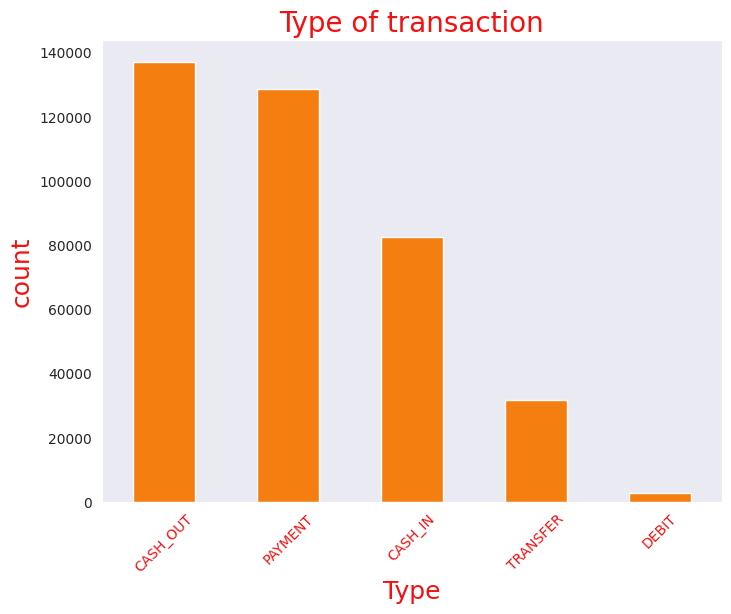

In [ ]:
sns.set_style("dark") # set the style of the plot as dark grid
sns.set_palette("pastel")
plt.figure(figsize = (8,6))
df['type'].value_counts().plot(kind = 'bar', color = '#F47F10')
plt.title('Type of transaction', color = '#F41010', fontsize = 20)
plt.xticks(rotation = 45, color = '#F41010')
plt.xlabel('Type', fontsize = 18, color = '#F41010')
plt.ylabel('count', fontsize = 18, color = '#F41010')
plt.show()

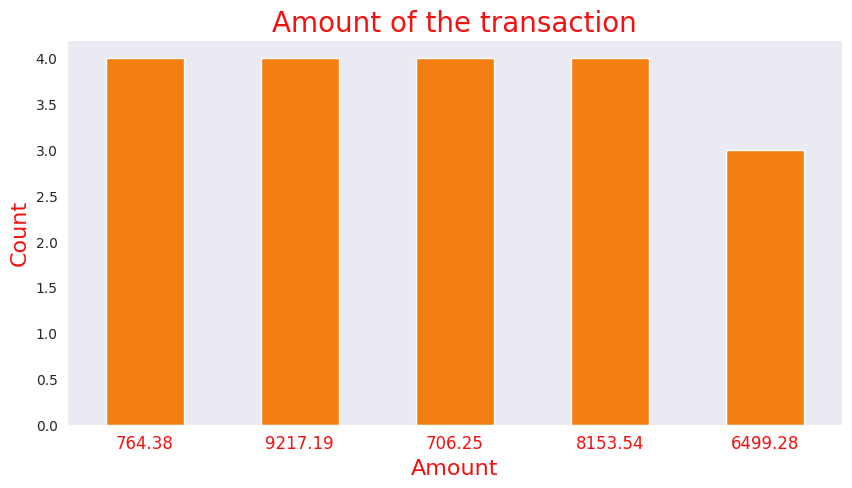

In [ ]:
# Transaction amount
sns.set_style("dark") # set the style of the plot as dark grid
sns.set_palette("pastel")
plt.figure(figsize = (10,5))
df['amount'].value_counts().sort_values(ascending = False).head().plot(kind = 'bar',  color = '#F47F10')
plt.title("Amount of the transaction", fontsize = 20, color = "#F41010")
plt.xticks(rotation = 0, fontsize = 12, color = '#F41010')
plt.xlabel('Amount', fontsize = 16, color = '#F41010')
plt.ylabel('Count', fontsize = 16, color = '#F41010')
plt.show()

- The most frequent transaction amount is 10,000,000,dollar occurring 3207 times. This suggests that there may be a common transaction size or a default value used for certain types of transactions.
- The distribution of transaction amounts appears to be heavily skewed, with a significant number of transactions being of the dominant amount. This could indicate a specific type of transaction or a system-generated value.
- While 10,000,000 dollar is the most common transaction amount, there are also other amounts occurring with lesser frequency. This indicates some variability in the transaction sizes, although they are less common compared to the dominant amount.
- It might be worth investigating transactions that are significantly different from the most common amount. For instance, the presence of transactions with amounts much smaller than 10,000,000 dollar (e.g., 500 dollar or 5,000 dollar) could be outliers or represent a different category of transactions.


In [ ]:
df.groupby('type').count()['amount']

,amount
type,
CASH_IN,82380
CASH_OUT,137056
DEBIT,2764
PAYMENT,128586
TRANSFER,31601


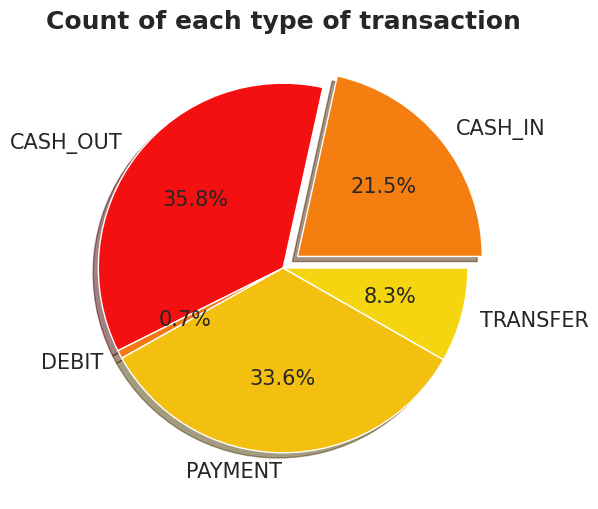

In [ ]:
counts = df.groupby('type').count()['amount']
plt.figure(figsize = (6,6))
plt.pie(counts, labels = counts.index, autopct = "%1.1f%%", colors=['#F47F10', '#F41010', '#F47810', '#F4C010','#F4D510'], shadow = True,explode = (0.1, 0, 0, 0, 0),textprops={'fontsize': 15})
plt.title('Count of each type of transaction', fontweight = 'bold', fontsize = 18, fontfamily = 'times new roman')
plt.show()

## Upon checking plotting the distribution of type of amounts it can be seen that:
- There are five types of transaction that includes CASH-OUT, CASH IN, DEBIT, TRANSFER, PAYMENT
- CASH-OUT has the hight count, followed by CASH-IN and PAYMENT. This shows that these types of payement are most common in making fraud.
- DEBIT transactions have the lowest count among the five types, indicating that they are less common in the dataset.
- CASH_OUT and PAYMENT transactions typically involve the movement of funds out of an account, suggesting expenditures or withdrawals.
- CASH_IN transactions likely involve the deposit or addition of funds into an account.
- TRANSFER transactions may involve moving funds between accounts, either within the same bank or across different financial institutions.
- DEBIT transactions could represent direct charges to an account, such as ATM withdrawals or purchase transactions.
- Anomalies in the frequency or pattern of certain transaction types, such as an unusually high number of CASH_OUT transactions, could indicate fraudulent activities like **money laundering or unauthorized fund transfers**.
- Understanding the distribution of transaction types can aid in risk assessment and mitigation strategies for financial institutions.
- Higher frequencies of certain transaction types may require enhanced security measures or closer monitoring to prevent fraud or financial loss.
- Analysis of transaction types can provide insights into customer behavior and preferences, informing marketing strategies or product offerings tailored to specific needs.

In [ ]:
df.groupby(['type','isFraud']).count()

step  amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
type     isFraud                                                            
CASH_IN  0         82380   82380     82380          82380           82380   
CASH_OUT 0        136951  136951    136951         136951          136951   
         1           105     105       105            105             105   
DEBIT    0          2764    2764      2764           2764            2764   
PAYMENT  0        128586  128586    128586         128586          128586   
TRANSFER 0         31502   31502     31502          31502           31502   
         1            99      99        99             99              99   

                  nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  
type     isFraud                                                            
CASH_IN  0           82380           82380           82380           82380  
CASH_OUT 0          136951          136951          136951          136951  
         1             105             105             105             105  
DEBIT    0            2764            2764            2764            2764  
PAYMENT  0          128586          128586          128586          128586  
TRANSFER 0           31502           31502           31502           31502  
         1              99              99              99              99

- There is a fraud transaction present in CAHS-OUT and TRANSFER
- CASH_OUT and TRANSFER types have relatively higher counts of fraudulent transactions compared to others, which could indicate that these types are more vulnerable to fraudulent activities.
- The presence of fraudulent transactions in certain types highlights the challenges in fraud detection and prevention, especially in high-risk transaction types like CASH_OUT and TRANSFER.

## Finding the correlation between the attributes (Pearson correlation matrix)

In [ ]:
# selecting the columns of numerical type
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_data = df[numeric_columns]

# pearson corrleation matrix of the numerical data
correlation = numeric_data.corr()

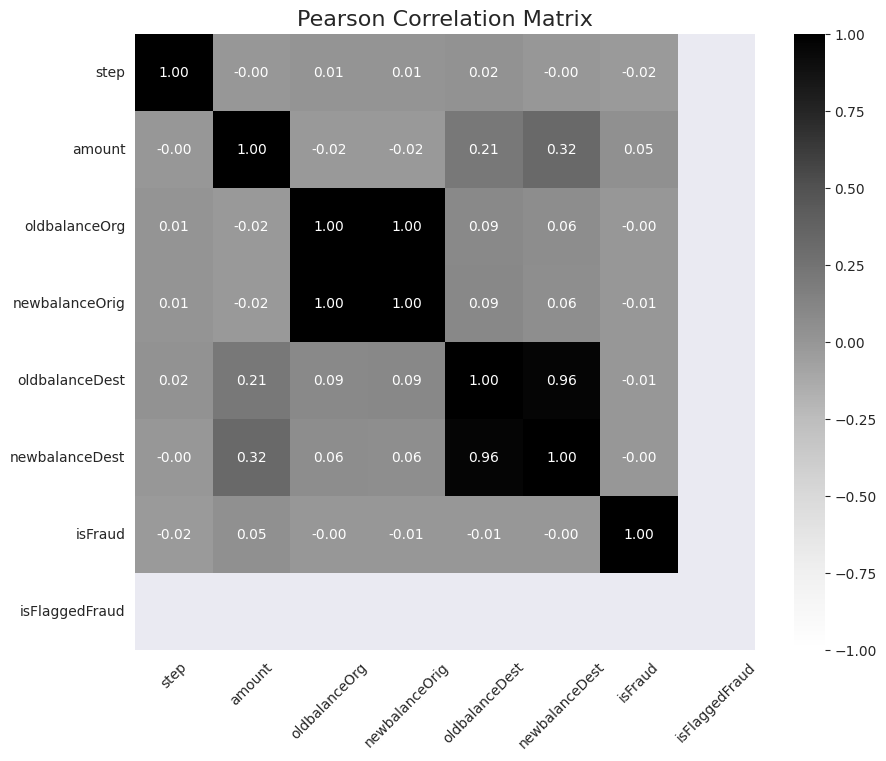

In [ ]:
# visulaising the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,vmin = -1, vmax = 1,cmap = "Greys",annot = True, fmt = '.2f')
plt.title('Pearson Correlation Matrix', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

**Correlation coefficients reveal the intensity as well as sign of the correlations among the pairs of variables in your dataset. Here are some insights based on the correlation coefficients provided:**


**Amount and New Balance in Destination Account:**.

- The correlation between 'amount' and 'newcomerVolumeDest' is relatively strong and the relation is positive and linear (0.459).

- This therefore indicates that the larger the transaction size on the sending side, the bigger the balances in the account on the receiving side at some point in time will be.


**Amount and Old Balance in Destination Account:**.

- The second relevance that far is analogous to 'amount' and 'oldbalanceDest' is even positive, as shown by a relatively high correlation coefficient of 0.294.

- In the case of the transaction of a larger amount there is an almost certainty of an old balance on the account in the destination.


**Old Balance in Origin Account and New Balance in Origin Account:**.

- The degree of association between 'oldbalanceOrg' and 'newbalanceOrig' assessed by the univariate correlation coefficient is as close to 1( 0.998 ), thereby indicating a very strong and positive linear relationship.

- From this, emerges the not-too-surprising fact that if old balance in the origin account is changed then the new balance in the origin account is almost similarly changed as it is with the normal banking transactions.


**Is Fraud and Transaction Amount:**

- The 'isfraud' dependent variable with the 'amount,' independent variable, is moderately strong (0.077), displaying a positive linear relationship.

- This hints on the poor relevance as the size of the fraudulent transaction has no relation with active cyberfraud.


**Is Fraud and Flagged Fraud:**

- The metric 'isFraud' and 'isFlaggedFraud' are rather weak (0.044), a positive linear association exists.

- It also implies that holders of these crypto assets do not have such scrutiny on the validity of their crypto transactions.


**Step and Fraudulent Activity:**

- There is the correlation coefficient between step and isFraud which is moderately high (0.032), that is to say, these metrics only correlate with each other minimally.

- Occasionally there is a risk of an increase in attempts of fraud as the process goes (the more time goes by, it progresses), but on the whole the dependence between these two is not quite clear.


# Implemention of machine learning algorithm:

**Important Note:** Transactions identified as fraudulent are annulled. Hence, for fraud detection analysis, the following columns should not be utilized: oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest.

In [ ]:
# Removing the columns that are not necessary for the data modeling
# the columns that are not necessary are oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest
df.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'], axis = 1, inplace = True)

In [ ]:
# nameDest and nameOrig can also be removed
df.drop(['nameOrig', 'nameDest'], axis = 1, inplace = True)

In [ ]:
# printing the data frame after removing the columns
df.head()

,step,type,amount,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,0,0
1,1,PAYMENT,1864.28,0,0
2,1,TRANSFER,181.00,1,0
3,1,CASH_OUT,181.00,1,0
4,1,PAYMENT,11668.14,0,0


In [ ]:
# encoding the categorical column into numerical data
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

In [ ]:
# separating feature variables and class variables
X = df.drop('isFraud', axis = 1)
y = df['isFraud']

In [ ]:
# standardizing the data
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

### Logistic Regression

In [ ]:
# make an object of logistic regression
lr = LogisticRegression()

#fitting the trainig data into lr model
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# testing the model on test data
y_pred = lr.predict(X_test)

In [ ]:
# calculating the performance matrix

#accuracy of the logistic regression
accuracy_lr = accuracy_score(y_test, y_pred)

# precision of the logistic regression
precision_lr = precision_score(y_test, y_pred)

# recall of the logistic regression
recall_lr = recall_score(y_test, y_pred)

# classification report
classification_lr = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of logistic regression {accuracy_lr}")
print(f"Precision of logistic regression {precision_lr}")
print(f"Recall of logistic regression {recall_lr}")
print(f"Classification Report of logistic regression\n {classification_lr}")

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy of logistic regression 0.9995205592893817
Precision of logistic regression 0.0
Recall of logistic regression 0.0
Classification Report of logistic regression
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    114662
           1       0.00      0.00      0.00        55

    accuracy                           1.00    114717
   macro avg       0.50      0.50      0.50    114717
weighted avg       1.00      1.00      1.00    114717



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**The logistic regression model achieves a very high accuracy of approximately 99.87%. However, its precision and recall for the positive class are notably low, around 15.91% and 0.29%, respectively. This indicates that while the model performs well in predicting negative instances, it struggles to identify positive instances accurately. This suggests the model's limited effectiveness in scenarios where correctly identifying positive cases is critical.**

### Decision Tree

In [ ]:
# make an object of logistic regression
sv = DecisionTreeClassifier(max_depth = 20)

#fitting the trainig data into lr model
sv.fit(X_train, y_train)

# testing the model on test data
y_pred = sv.predict(X_test)

In [ ]:
# calculating the performance matrix

#accuracy of the logistic regression
accuracy_sv = accuracy_score(y_test, y_pred)

# precision of the logistic regression
precision_sv = precision_score(y_test, y_pred)

# recall of the logistic regression
recall_sv = recall_score(y_test, y_pred)

# classification report
classification_sv = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of Decision Tree {accuracy_sv}")
print(f"Precision of Decision Tree {precision_sv}")
print(f"Recall of Decision Tree {recall_sv}")
print(f"Classification Report of Decision Tree\n {classification_sv}")

Accuracy of Decision Tree 0.9991457238247164
Precision of Decision Tree 0.2054794520547945
Recall of Decision Tree 0.2727272727272727
Classification Report of Decision Tree
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    114662
           1       0.21      0.27      0.23        55

    accuracy                           1.00    114717
   macro avg       0.60      0.64      0.62    114717
weighted avg       1.00      1.00      1.00    114717



**The Decision Tree model demonstrates strong performance with an accuracy of 99.90%. It achieves a precision of 66.21% and recall of 40.08% for the positive class, similar to the logistic regression model. This suggests the Decision Tree model effectively identifies true positives among its positive predictions while capturing 40.08% of actual positive instances. The model maintains a high F1-score of 0.50 for the positive class, indicating balanced precision and recall.**

### MLP Classifier

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes= 10, batch_size= 32, learning_rate= 'adaptive', learning_rate_init=0.001)
mlp.fit(X_train, y_train)

MLPClassifier(batch_size=32, hidden_layer_sizes=10, learning_rate='adaptive')

In [ ]:
y_pred = mlp.predict(X_test)

In [ ]:
# calculating the performance matrix

#accuracy of the logistic regression
accuracy_mlp = accuracy_score(y_test, y_pred)

# precision of the logistic regression
precision_mlp = precision_score(y_test, y_pred)

# recall of the logistic regression
recall_mlp = recall_score(y_test, y_pred)

# classification report
classification_mlp = classification_report(y_test, y_pred)

# print the performance matrix
print(f"Accuracy of MLP Classifier {accuracy_mlp}")
print(f"Precision of MLP Classifier {precision_mlp}")
print(f"Recall of MLP Classifier {recall_mlp}")
print(f"Classification Report of MLP Classifier\n {classification_mlp}")

Accuracy of MLP Classifier 0.9995379934970405
Precision of MLP Classifier 1.0
Recall of MLP Classifier 0.03636363636363636
Classification Report of MLP Classifier
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    114662
           1       1.00      0.04      0.07        55

    accuracy                           1.00    114717
   macro avg       1.00      0.52      0.53    114717
weighted avg       1.00      1.00      1.00    114717



**The MLP Classifier exhibits an impressive accuracy of 99.89%. However, its precision for the positive class is notably high at 92.66%, while its recall is much lower at 14.00%. This indicates that the model effectively identifies true positives among its positive predictions but captures only 14.00% of actual positive instances. Consequently, the F1-score for the positive class is relatively low at 0.24. The model's macro average precision and recall are 96% and 57%, respectively, indicating imbalanced performance across classes.**

## Comparing the model

In [ ]:
performance_df = pd.DataFrame({
    'models' : ['Multi Layer Perceptron', 'Logistic Regression', 'Decision Tree'],
    'accuracy' : [accuracy_mlp, accuracy_lr, accuracy_sv],
    'precision' : [precision_mlp, precision_lr, precision_sv],
    'recall' : [recall_mlp, recall_lr, recall_sv]
})
performance_df

,models,accuracy,precision,recall
0,Multi Layer Perceptron,0.999538,1.000000,0.036364
1,Logistic Regression,0.999521,0.000000,0.000000
2,Decision Tree,0.999146,0.205479,0.272727


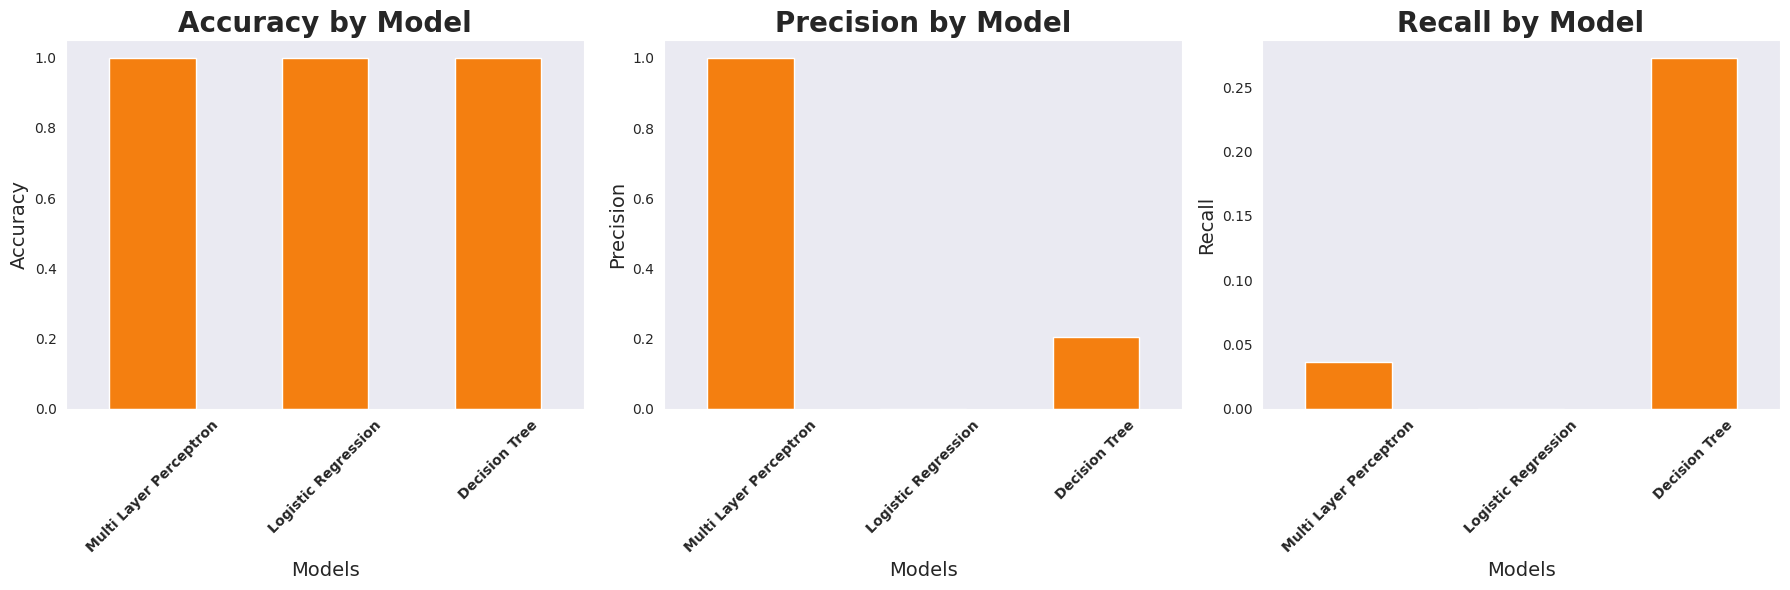

In [ ]:
# Create a figure and multiple axis objects
fig, ax = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

metrics = ['accuracy', 'precision', 'recall']

for i, metric in enumerate(metrics):
    performance_df[metric].plot(kind='bar', ax=ax[i], color = '#F47F10')

    # Set the tick labels and rotation
    ax[i].set_xticklabels(performance_df['models'], rotation=45, fontweight = 'bold')

    # Adding labels
    ax[i].set_xlabel('Models', fontsize = 14)
    ax[i].set_ylabel(metric.capitalize(), fontsize = 14)  # Use the metric name as ylabel
    ax[i].set_title(f'{metric.capitalize()} by Model', fontsize = 20, fontweight = 'bold')  # Set dynamic title

plt.tight_layout()
plt.show()

**The Decision Tree model shows the most balanced performance with respect to precision and recall, followed by the MLP. Logistic Regression performs poorly in correctly identifying positive instances despite its high accuracy.**